# Case study on Supervised learning

# 1. Read the dataset to the python environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_excel('iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps

In [9]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='PL', ylabel='Density'>

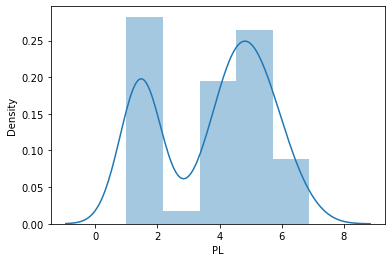

In [15]:
sns.distplot(data.PL)

<AxesSubplot:xlabel='SW', ylabel='Density'>

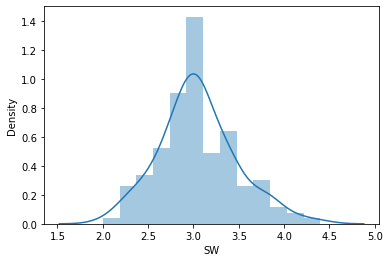

In [16]:
sns.distplot(data.SW)

<AxesSubplot:xlabel='SL', ylabel='Density'>

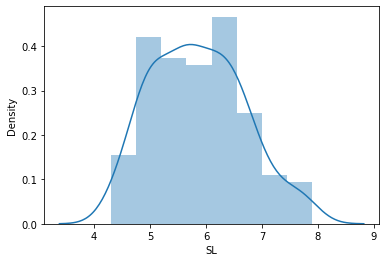

In [17]:
sns.distplot(data.SL)

In [20]:
#filling missing values with median
data['SL'].fillna(data['SL'].median(),inplace=True)
data['SW'].fillna(data['SW'].median(),inplace=True)
data['PL'].fillna(data['PL'].median(),inplace=True)

<AxesSubplot:xlabel='PW'>

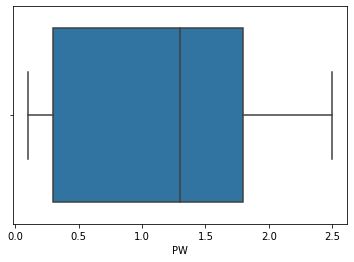

In [21]:
sns.boxplot(data.PW)

<AxesSubplot:xlabel='PL'>

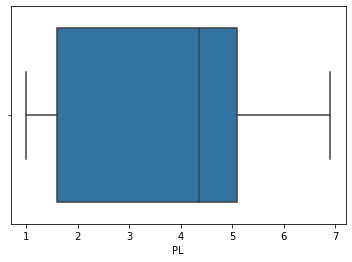

In [22]:
sns.boxplot(data.PL)

<AxesSubplot:xlabel='SW'>

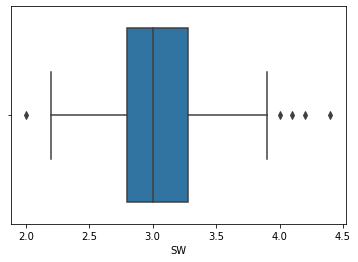

In [23]:
sns.boxplot(data.SW)

outlier is present in SW

<AxesSubplot:xlabel='SL'>

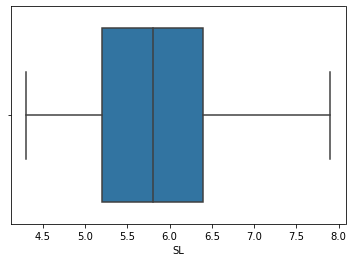

In [24]:
sns.boxplot(data.SL)

In [27]:
Q1=np.percentile(data['SW'],25,interpolation="midpoint")
Q3=np.percentile(data['SW'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in data["SW"]:
    if(x>=up_lim)or(x<=low_lim):
        outlier.append(x)

med_sw=float(np.median(data['SW']))
for i in outlier:
    data.loc[data['SW']==i, 'SW'] = np.nan 
    
#replace null values with median value
data['SW'].fillna(med_sw,inplace=True)

<AxesSubplot:xlabel='SW'>

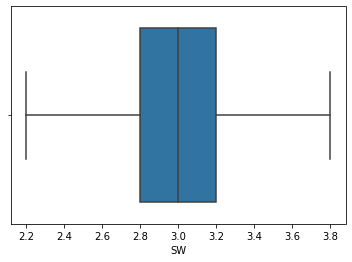

In [28]:
sns.boxplot(data.SW)

In [29]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

In [30]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
data['Classification']=lab.fit_transform(data['Classification'])
data['Classification']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

In [31]:
y=data['Classification']
x=data.drop(['Classification'], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

1) Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
F1 score is: 0.9666666666666667


In [35]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

2) KNN Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

In [39]:
acc_values

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'accuracy')

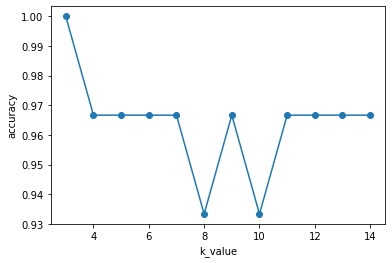

In [41]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [43]:
#KNN Model with k=3
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [44]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

3) Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dec_model=DecisionTreeClassifier()
dec_model.fit(x_train,y_train)
y_pred=dec_model.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
F1 score is: 0.9666666666666667


In [49]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

4) Linear SVM

In [50]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
F1 score is: 0.9666666666666667


Polynomial SVM

In [51]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9
Precision is: 0.9
Recall is: 0.9
F1 score is: 0.9


Radial SVM

In [53]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
F1 score is: 0.9666666666666667


5) RandomForest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9666666666666667
Precision is: 0.9666666666666667
Recall is: 0.9666666666666667
F1 score is: 0.9666666666666667


KNN Model with k=3 is the best